# __Capstone Project 2: Exploratory Data Analysis__

### __Imports__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

### __Load Data__

In [2]:
# Data can be found here https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
df = pd.read_csv('./data/data.csv', delimiter=';')

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
# Target data
df.Target

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object

In [6]:

print('Percentage of \'enrolled\' students: {:.2f}%'.format(float(df.Target[df.Target == 'Enrolled'].value_counts() / df.shape[0] * 100)))

Percentage of 'enrolled' students: 17.95%


It looks like we could easily remove the 'Enrolled' students from our dataset as they do not represent a large portion of the data and it might be more interesting to consider the cases of graduated or dropped out students only.

In [7]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=0)

,count,%
Marital status,0,0.0
Age at enrollment,0,0.0
Curricular units 1st sem (credited),0,0.0
Curricular units 1st sem (enrolled),0,0.0
Curricular units 1st sem (evaluations),0,0.0
Curricular units 1st sem (approved),0,0.0
Curricular units 1st sem (grade),0,0.0
Curricular units 1st sem (without evaluations),0,0.0
Curricular units 2nd sem (credited),0,0.0
Curricular units 2nd sem (enrolled),0,0.0


It looks like we are very fortunate to have a clean dataset with no missing values.

In [8]:
df.select_dtypes(include=['object']).columns

Index(['Target'], dtype='object')

The only columns with categorical data are 'Target', which will make classification easier.

In [9]:
df.Nacionality.value_counts()

Nacionality
1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
103       3
21        2
101       2
62        2
25        2
2         2
105       2
32        1
13        1
109       1
108       1
14        1
17        1
Name: count, dtype: int64

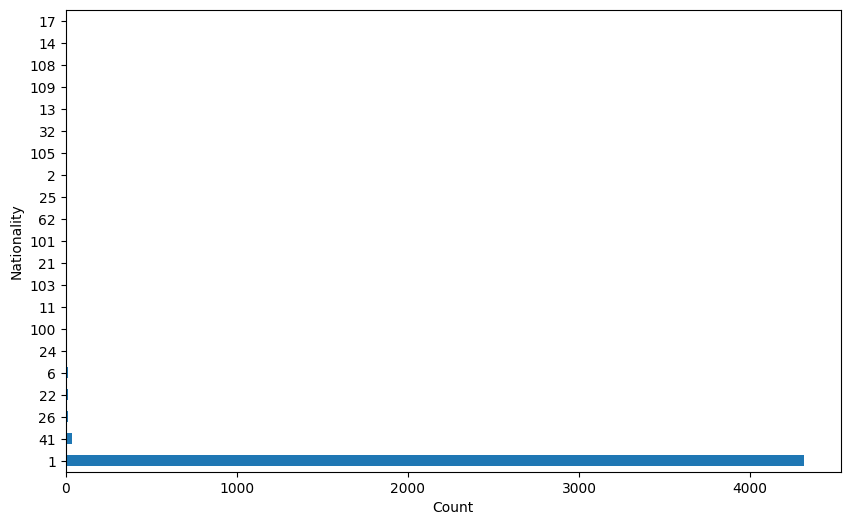

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
df.Nacionality.value_counts().plot(kind='barh', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Nationality')
plt.show()

In [14]:
def txt_to_dict(file, dict):
    """Read text file and add key-value pairs to the dictionary."""
    with open(file, 'r') as f:
        for line in f:
            t = line.split('-')
            # t[0] = t[0].rstrip().lstrip()
            t[0] = t[0].strip()
            t[1] = t[1].strip()
            # t[1] = t[1].lstrip()
            dict[t[0]] = t[1]

In [15]:
file = './data/mother_occupation.txt'

mother_occ = {}
father_occ = {}
txt_to_dict(file, mother_occ)
txt_to_dict('./data/father_occupation.txt', father_occ)

In [16]:
print(mother_occ)
print(father_occ)

{'0': 'Student', '1': 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers', '2': 'Specialists in Intellectual and Scientific Activities', '3': 'Intermediate Level Technicians and Professions', '4': 'Administrative staff', '5': 'Personal Services, Security and Safety Workers and Sellers', '6': 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', '7': 'Skilled Workers in Industry, Construction and Craftsmen', '8': 'Installation and Machine Operators and Assembly Workers', '9': 'Unskilled Workers', '10': 'Armed Forces Professions', '90': 'Other Situation', '99': '(blank)', '122': 'Health professionals', '123': 'teachers', '125': 'Specialists in information and communication technologies (ICT)', '131': 'Intermediate level science and engineering technicians and professions', '132': 'Technicians and professionals, of intermediate level of health', '134': 'Intermediate level technicians from legal, social, sports, cultu